# Prédiction de la valeur du VKOSPI

https://www.kaggle.com/datasets/ninetyninenewton/vkospi

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")

Commençons par regarder quelques données :

In [2]:
df = pd.read_csv("options_KR.csv")
df.head(10)

,Date,VKOSPI,KOSPI200,Open_interest,For_KOSPI_Netbuying_Amount,For_Future_Netbuying_Quantity,For_Call_Netbuying_Quantity,For_Put_Netbuying_Quantity,Indiv_Future_Netbuying_Quantity,Indiv_Call_Netbuying_Quantity,Indiv_Put_Netbuying_Quantity,PCRatio,Day_till_expiration,Day_of_a_week
0,2009-06-02,33.45,180.90,4377777,4.940000e+11,-4953,-24646,6581,1228,-466,31336,0.94,7,Tue
1,2009-06-03,32.66,180.47,4562690,-8.997074e+10,47,-57128,46851,399,127709,-22259,0.93,6,Wed
2,2009-06-04,32.56,180.31,4827524,-1.090000e+11,-7666,-2000,48883,5744,262558,10367,0.87,5,Thu
3,2009-06-05,32.95,175.75,5022921,9.842024e+10,969,64792,27196,-1688,79789,113935,0.89,4,Fri
4,2009-06-08,30.41,177.77,5293996,4.329179e+10,5797,10995,23123,-5534,97154,146244,0.81,3,Mon
5,2009-06-09,30.46,177.67,5520545,9.251058e+10,-10439,-9091,33572,4393,165009,12536,1.02,2,Tue
6,2009-06-10,29.31,174.91,5993901,4.340000e+11,11560,3077,86890,-2457,-96238,229505,0.84,1,Wed
7,2009-06-11,30.01,180.91,6296014,7.060000e+11,-2304,-15814,56467,6899,382842,595436,1.08,0,Thu
8,2009-06-12,29.78,181.43,1006401,2.490000e+11,2658,14800,47655,-77,-23011,-11870,1.33,19,Fri
9,2009-06-15,31.29,182.69,1440250,-4.750943e+10,-4368,-13868,10659,309,-1396,-886,1.19,18,Mon


Assurons-nous que la colonne *Date* est bien au bon format et vérifions que nous n'ayons pas de données manquantes :

In [3]:
df["Date"] = pd.to_datetime(df["Date"], format="%Y-%m-%d")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             2580 non-null   datetime64[ns]
 1   VKOSPI                           2580 non-null   float64       
 2   KOSPI200                         2580 non-null   float64       
 3   Open_interest                    2580 non-null   int64         
 4   For_KOSPI_Netbuying_Amount       2580 non-null   float64       
 5   For_Future_Netbuying_Quantity    2580 non-null   int64         
 6   For_Call_Netbuying_Quantity      2580 non-null   int64         
 7   For_Put_Netbuying_Quantity       2580 non-null   int64         
 8   Indiv_Future_Netbuying_Quantity  2580 non-null   int64         
 9   Indiv_Call_Netbuying_Quantity    2580 non-null   int64         
 10  Indiv_Put_Netbuying_Quantity     2580 non-null   int64      

# Visualisation

Puisque nous n'avons pas d'alertes particulières, commençons à regarder la base de données plus précisemment.

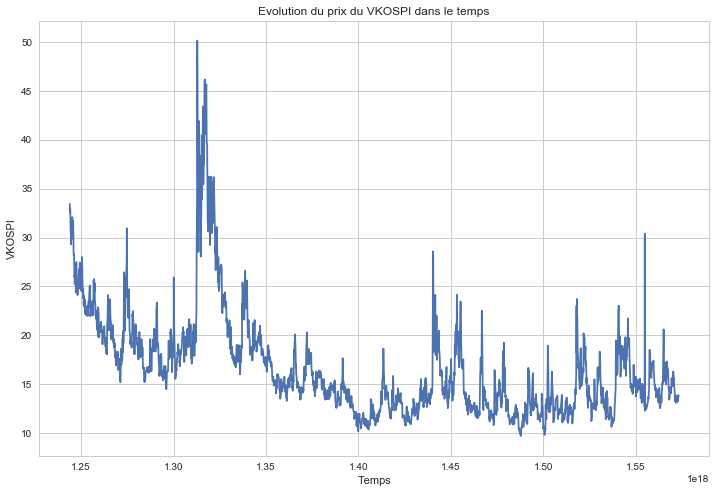

In [4]:
plt.figure(figsize=(12, 8))

plt.plot(df["Date"], df["VKOSPI"], label="VKOSPI")
plt.xlabel("Temps")
plt.ylabel("VKOSPI")
plt.title("Evolution du prix du VKOSPI dans le temps")
plt.show()

Nous observons certaines tendances dans la valeurs à prédire. Regardons à présent ses dépendances avec autres informations.

In [5]:
def explore_column(df, column, alpha=0.8, figsize=(15, 8)):
    
    def plot_histogram():
        plt.hist(df[column])
        plt.xlabel(column.capitalize())
        plt.title("Distribution de la variable %s" % column)
    
    def plot_price(alpha=alpha):
        plt.scatter(x=df[column], y=df["VKOSPI"], alpha=alpha)
        plt.xlabel(column.capitalize())
        plt.ylabel("VKOSPI")
        plt.title("VKOSPI in function of %s" % column)
    
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plot_histogram()
    plt.subplot(1, 2, 2)
    plot_price()
    
    plt.suptitle("Variable %s" % column)
    plt.show()

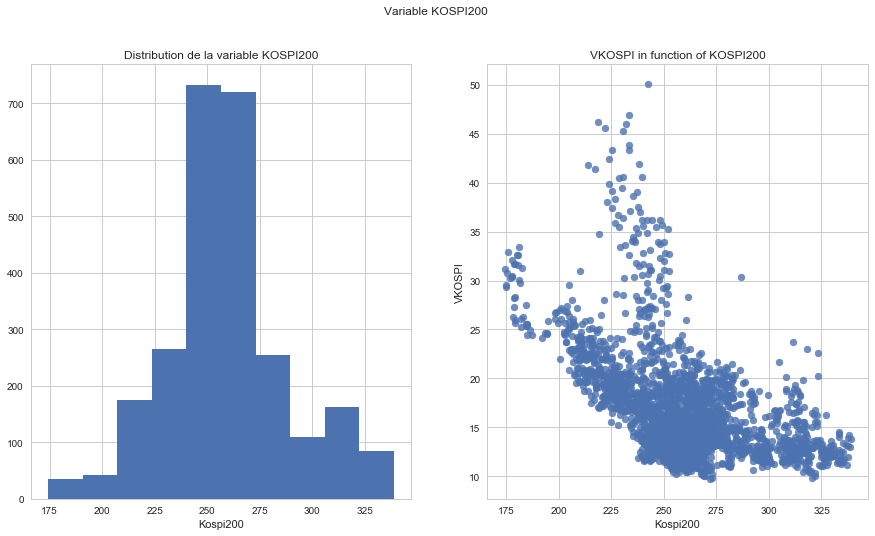

In [6]:
explore_column(df, "KOSPI200")

Nous répétons cette étape afin d'avoir la meilleure compréhension des données possibles. Mais nous n'avons pas de vision temporelle. Rectifions cela :

In [7]:
def variation_through_time(df, column, figsize=(15, 8)):
    plt.figure(figsize=figsize)
    
    ax = plt.subplot()
    ax.plot(df["Date"], df["VKOSPI"], c=sns.color_palette()[0])
    ax.set_ylabel("VKOSPI", color=sns.color_palette()[0])
    
    ax2 = ax.twinx()
    ax2.plot(df["Date"], df[column], c=sns.color_palette()[1])
    ax2.set_ylabel(column, color=sns.color_palette()[1])
    
    plt.show()

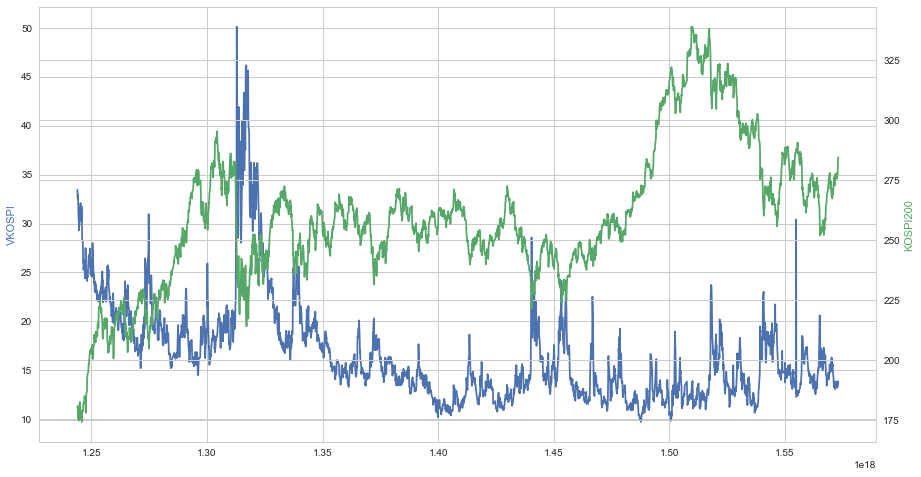

In [8]:
variation_through_time(df, "KOSPI200")

L'utilisation de l'information de la valeur du *KOSPI200* peut être intéressante pour prédire la valeur du *VKOSPI* mais cela ne semble pas complétement suffisant.

# Modélisation

Après avoir répéter les étapes précédentes pour continuer d'aggréger des intuitions sur les données, nous pouvons commencer la phase de prédiction.

In [9]:
df = df.sort_values(by="Date")
df = pd.get_dummies(df, columns=["Day_of_a_week"])
X = df.drop(columns=["VKOSPI", "Date"], axis=1)
y = df["VKOSPI"]



def make_historical_split(X, y, train_ratio=0.8):
    max_index = int(train_ratio * X.shape[0])
    return X.iloc[:max_index, ], X.iloc[max_index:, ], y[:max_index, ], y[max_index:, ]


X_train, X_test, y_train, y_test = make_historical_split(X, y)

De manière similaire aux TP précédent, nous allons construire une fonction qui nous permettra de mesurer précisement les performances des algorithmes que l'on testera.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error, r2_score



RMSE = lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred))
RMSE.__name__ = "RMSE"

def train_predict(model, X, y, name, train_ratio=[0.5, 0.6, 0.7, 0.8, 0.9], metric=mean_squared_error):
    scores = []
    for ratio in train_ratio:
        X_train, X_test, y_train, y_test = make_historical_split(X, y, train_ratio=ratio)
        model_fitted = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(metric(y_true=y_test, y_pred=y_pred))
    
    mean_scores = np.mean(scores)
    std_scores = np.std(scores)
    print("%s : %0.2f (+/- %0.2f)" % (name, mean_scores, std_scores))
    return scores

Testons !

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


models = [
    {'model': Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())]), 'name': "Linear"},
    {'model': DecisionTreeRegressor(), 'name': "Tree"},
    {'model': DecisionTreeRegressor(max_depth=5), 'name': "Tree 5"},
    {'model': DecisionTreeRegressor(max_depth=7), 'name': "Tree 7"},
    {'model': DecisionTreeRegressor(max_depth=7), 'name': "Tree 9"},
    {'model': RandomForestRegressor(), 'name': "RF"},
    {'model': RandomForestRegressor(n_estimators=10, max_depth=5), 'name': "RF 10T-5"},
    {'model': RandomForestRegressor(n_estimators=20, max_depth=5), 'name': "RF 20T-5"},
    {'model': RandomForestRegressor(n_estimators=20, max_depth=7), 'name': "RF 20T-7"},
    {'model': ExtraTreesRegressor(n_estimators=10, max_depth=5), 'name': "ExT 10T-5"},
    {'model': ExtraTreesRegressor(n_estimators=20, max_depth=5), 'name': "ExT 20T-5"},
    {'model': ExtraTreesRegressor(n_estimators=20, max_depth=7), 'name': "ExT 20T-7"}
]


for model_dict in models:
    model, name = model_dict["model"], model_dict["name"]
    train_predict(model, X, y, name, metric=RMSE)

Linear : 2.90 (+/- 0.37)
Tree : 4.71 (+/- 0.99)
Tree 5 : 4.13 (+/- 1.06)
Tree 7 : 4.25 (+/- 1.33)
Tree 9 : 4.26 (+/- 1.35)
RF : 4.00 (+/- 1.49)
RF 10T-5 : 3.93 (+/- 1.13)
RF 20T-5 : 3.89 (+/- 1.08)
RF 20T-7 : 3.99 (+/- 1.29)
ExT 10T-5 : 3.60 (+/- 1.05)
ExT 20T-5 : 3.45 (+/- 0.86)
ExT 20T-7 : 3.70 (+/- 1.12)


Nous voyons que la régression linéaire fonctionne plutôt bien alors que les méthodes à bases d'arbres moins. Notons que la performances des ExtraTrees est conforme à la théorie : nous avons une variance réduite. Mais nous avons également une meilleure valeur !
Cela est également cohérent avec le graphique de l'évolution du *VKOSPI* dans le temps : les valeurs n'étaient pas aussi faible sur la première partie qui sert d'entraînement par rapport à la seconde partie qui sert de test.

Essayons de visualiser les prédictions dans le temps par rapport à la vrai valeur :

In [12]:
def visualize_predictions(model, X, y, train_ratio=0.8):
    X_train, X_test, y_train, y_test = make_historical_split(X, y, train_ratio=train_ratio)
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    max_index = int(train_ratio * X.shape[0])
    date = df["Date"][max_index:]
    
    plt.figure(figsize=(12, 8))
    plt.plot(date, y_test, label="Test")
    plt.plot(date, y_pred, label="Prediction")
    
    plt.xlabel("Temps")
    plt.ylabel("VKOSPI")
    plt.title(model.__class__.__name__)
    plt.legend()
    plt.show()
    

Commençons par la régression linéaire :

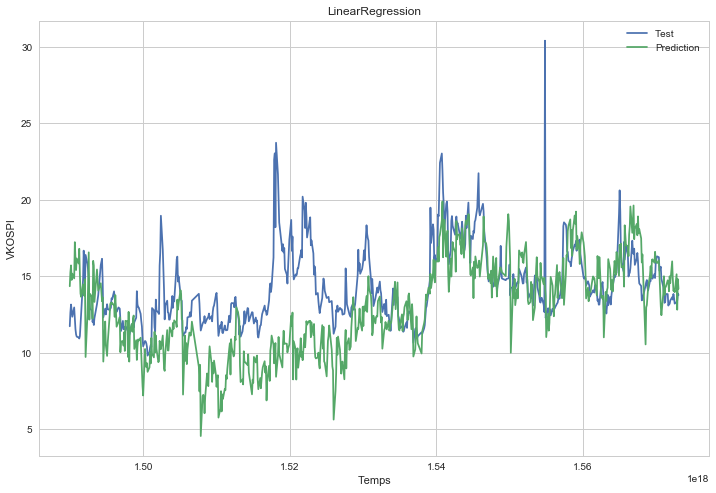

In [13]:
visualize_predictions(LinearRegression(), X, y, train_ratio=0.75)

Les tendances ne sont pas parfaitement comprise, mais les valeurs sont parfois très proche. Il faut faire mieux, mais nous avons une bonne base.
Passons à un ExtraTrees :

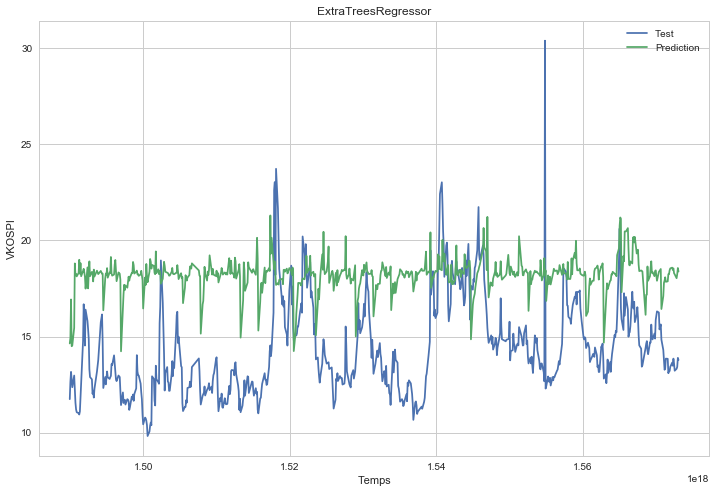

In [14]:
visualize_predictions(ExtraTreesRegressor(n_estimators=20, max_depth=7), X, y, train_ratio=0.75)

On observe cette fois que l'on oscille autour d'une valeur moyenne : nous n'avons pas du tout les tendances. Le modèle n'est pas performant.

Que se passe-t-il si nous combinons les deux modèles ? Si nous faisions au final un ensemble de modèle ?

In [15]:
from sklearn.ensemble import VotingRegressor


model = VotingRegressor([
    ('LinearRegression', Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())])), 
    ('ExtraTrees2', ExtraTreesRegressor(n_estimators=20, max_depth=7)), 
])


models = [
    {'model': Pipeline([('scaler', StandardScaler()), ('regression', LinearRegression())]), 'name': "Linear"},
    {'model': ExtraTreesRegressor(n_estimators=20, max_depth=7), 'name': "ExT 20T-7"},
    {'model': model, 'name': "Voting"}
]

for metric in [RMSE, r2_score]:
    print(metric.__name__ + " " + "-"*5)
    for model_dict in models:
        model, name = model_dict["model"], model_dict["name"]
        train_predict(model, X, y, name, metric=metric)
    print()

RMSE -----
Linear : 2.90 (+/- 0.37)
ExT 20T-7 : 3.65 (+/- 1.13)
Voting : 2.77 (+/- 0.52)

r2_score -----
Linear : -0.33 (+/- 0.27)
ExT 20T-7 : -1.31 (+/- 1.17)
Voting : -0.23 (+/- 0.50)



Nous avons donc un $R^2$ négatif : nos modèle sont moins performant qu'une prédiction de la moyenne ! Il faut donc faire un plus gros travail sur les features.

**Au travail !**